In [46]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
import random
from matplotlib import pyplot as plt
from tqdm import tqdm
import time

In [47]:
def read_data(file_name):
    data = pd.read_csv(file_name)
    feature_cols = []
    for label in data.columns:
        if label[0] == "X" or label[0] == "Y":
            feature_cols.append(label)
        elif label[0] == "R":
            break
    
    print(feature_cols)

    label_cols = ["ResultPositionX", "ResultPositionY", "ResultDirectionX", "ResultDirectionY"]
    x = data[feature_cols]
    y = data[label_cols]
    return x, y

In [48]:
def train_model_normal(x_train, y_train):
    rf = RandomForestRegressor(n_estimators=400, random_state=12345, verbose=1)
    rf.fit(
        x_train, y_train
    )
    return rf


In [49]:
def validate(rf, x_test, y_test):
    y_pred = rf.predict(x_test)
    distance = []
    direction = []

    for i in range(len(y_test)):
        error_x = y_test.iloc[i].iloc[0] - y_pred[i][0]
        error_y = y_test.iloc[i].iloc[1] - y_pred[i][1]
        distance.append(math.sqrt(error_x ** 2 + error_y**2))

        dp = y_test.iloc[i].iloc[2]  * y_pred[i][2] + y_test.iloc[i].iloc[3]  * y_pred[i][3]
        mag1 = math.sqrt(y_test.iloc[i].iloc[2] ** 2 + y_test.iloc[i].iloc[3] ** 2)
        mag2 = math.sqrt(y_pred[i][2] ** 2 + y_pred[i][3] ** 2)
        direction.append(math.degrees(math.acos(dp / mag1 / mag2)) * random.choice([1, -1]))

    return distance, direction

In [42]:

train_loss = []
test_loss = []
n_trees = np.linspace(10, 400, 10, dtype=int)

rf = RandomForestRegressor(n_estimators=10, random_state=12345, warm_start=True, verbose=1)
for n in n_trees:
    print(f"Running RandomForestRegressor on {n} trees")
    rf.n_estimators = n  # Increase number of trees
    rf.fit(x_train, y_train)  # Train the model incrementally
    
    # Predict on training and test data
    y_train_pred = rf.predict(x_train)
    y_test_pred = rf.predict(x_test)
    
    # Compute Mean Squared Error (MSE)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Store the errors
    train_loss.append(train_mse)
    test_loss.append(test_mse)


Running RandomForestRegressor on 10 trees
Running RandomForestRegressor on 53 trees


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Running RandomForestRegressor on 96 trees


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Running RandomForestRegressor on 140 trees


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


Running RandomForestRegressor on 183 trees


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Running RandomForestRegressor on 226 trees


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s


Running RandomForestRegressor on 270 trees


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s


Running RandomForestRegressor on 313 trees


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s


Running RandomForestRegressor on 356 trees


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s


Running RandomForestRegressor on 400 trees


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s


NameError: name 'test_loss' is not defined

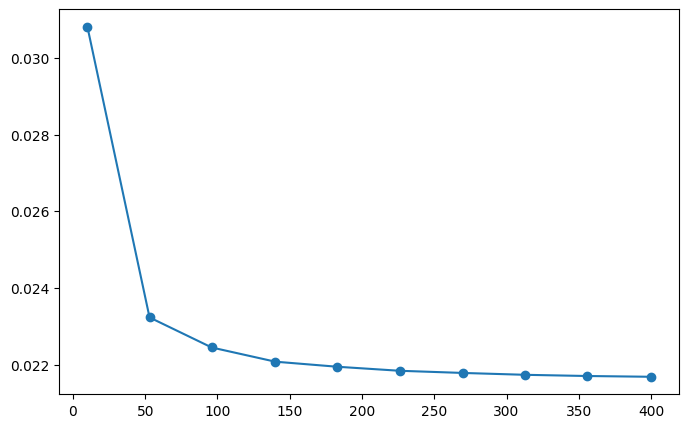

In [41]:
plt.figure(figsize=(8, 5))
plt.plot(n_trees, train_loss, label="Training MSE", marker="o")
plt.plot(n_trees, test_loss, label="Test MSE", marker="s")
plt.xlabel("Number of Trees")
plt.ylabel("Mean Squared Error")
plt.title("Training and Test Loss Based on # of Trees")
plt.legend()
plt.show()

In [ ]:
#actually run the model
data = "output_x3_y2.csv"
print("Reading Data...")
x, y = read_data(data)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 12345)
print("Training model...")
rf = train_model_normal(x_train, y_train)
print("Validating model...")
distance, direction = validate(rf, x_test, y_test)


['XStripID1', 'XStripID2', 'XStripID3', 'YStripID1', 'YStripID2', 'XStripEnergy1', 'XStripEnergy2', 'XStripEnergy3', 'YStripEnergy1', 'YStripEnergy2']


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   17.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s


Average distance: 0.14772476317756233


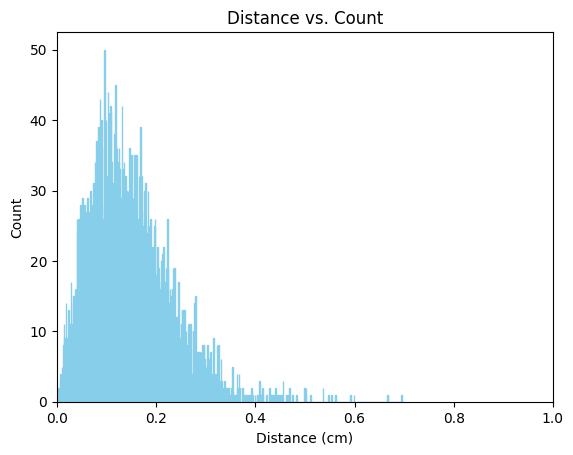

In [52]:
print("Average distance:", np.average(distance))
plt.hist(distance, bins=500, edgecolor='skyblue')
bottom, top = plt.ylim()
# plt.ylim(0, 10)
plt.xlim(0, 1)
plt.xlabel('Distance (cm)')
plt.ylabel('Count')
plt.title('Distance vs. Count')
plt.show()

Average direction: 1.351660802078067


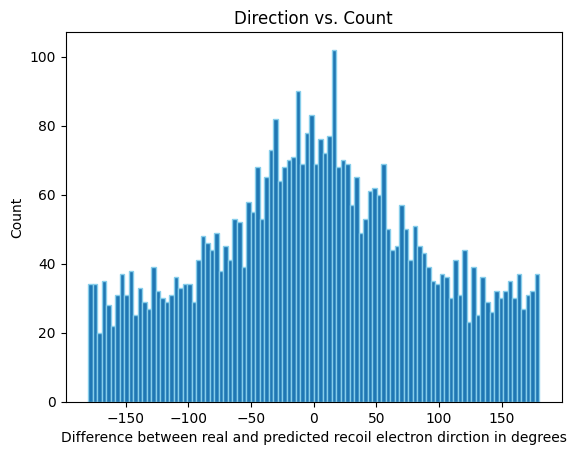

In [53]:
print("Average direction:", np.average(direction))
plt.hist(direction, bins=100, edgecolor='skyblue')
plt.xlabel('Difference between real and predicted recoil electron dirction in degrees')
plt.ylabel('Count')
plt.title('Direction vs. Count')
plt.show()